### 1. Binomial Variables
$$f(k)=\left(\begin{array}{l}{n} \\ {k}\end{array}\right) p^{k}(1-p)^{n-k}$$

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom as Binom
from scipy.stats import multinomial as mt

[35 29 25 33 27 33 26 28 29 26] 29.9


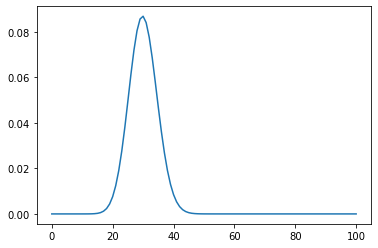

In [8]:
n, p = 100, 0.3
num_samples = 10000
binom = Binom(n, p)
# each item is the number of heads
res = binom.rvs(num_samples)
print(res[:10], res.mean())

binom.mean() == n*p, np.sqrt(n*p*(1-p)*1) == binom.std()

x = np.arange(n+1);
plt.plot(x, binom.pmf(x))

### 2. Multinomial Variables

A generalization of binomial distribution, each random variable can take $k$ values and 
$$p(\mathbf{x} | \boldsymbol{\mu})=\prod_{k=1}^{K} \mu_{k}^{x_{k}},$$
for Bernoulli distribution it is 
$$p(\mathbf{x} | \boldsymbol{\mu})=\mu^x(1-\mu)^{1-x}.$$
The mean is 
$$\mathbb{E}[\mathbf{x} | \boldsymbol{\mu}]=\sum_{\mathbf{x}} p(\mathbf{x} | \boldsymbol{\mu}) \mathbf{x}=\left(\mu_{1}, \ldots, \mu_{M}\right)^{\mathrm{T}}=\boldsymbol{\mu},$$
the likelihood is 
$$p(\mathcal{D} | \boldsymbol{\mu})=\prod_{n=1}^{N} \prod_{k=1}^{K} \mu_{k}^{x_{n k}}=\prod_{k=1}^{K} \mu_{k}^{\left(\sum_{n} x_{n k}\right)}=\prod_{k=1}^{K} \mu_{k}^{m_{k}},$$
where $m_{k}=\sum_{n} x_{n k}$. The maximum likelihood of parameter is in the form
$$\mu_{k}^{\mathrm{ML}}=\frac{m_{k}}{N}.$$
The joint distribution of quatities $m_1,\dots, m_k$ is 
$$\operatorname{Mult}\left(m_{1}, m_{2}, \ldots, m_{K} | \boldsymbol{\mu}, N\right)=\left(\begin{array}{c}{N} \\ {m_{1} m_{2} \ldots m_{K}}\end{array}\right) \prod_{k=1}^{K} \mu_{k}^{m_{k}}= \frac{N !}{m_{1} ! m_{2} ! \ldots m_{K} !}\prod_{k=1}^{K} \mu_{k}^{m_{k}}$$

In [11]:
# number of result in each class.
num_samples = 10000
mt(num_samples, [0.3, 0.2, 0.5]).rvs(3)/num_samples

array([[0.3042, 0.2025, 0.4933],
       [0.2976, 0.1984, 0.504 ],
       [0.3018, 0.2002, 0.498 ]])

### 3. The Dirichlet distribution

It can be a prior for multinomial distribution. Notice that $\alpha_i$ do not have to be integers.
$$\operatorname{Dir}(\boldsymbol{\mu} | \boldsymbol{\alpha})=\frac{\Gamma\left(\alpha_{0}\right)}{\Gamma\left(\alpha_{1}\right) \cdots \Gamma\left(\alpha_{K}\right)} \prod_{k=1}^{K} \mu_{k}^{\alpha_{k}-1}$$
The posterior is still Dirichlet
$$\begin{aligned} p(\boldsymbol{\mu} | \mathcal{D}, \boldsymbol{\alpha}) &=\operatorname{Dir}(\boldsymbol{\mu} | \boldsymbol{\alpha}+\mathbf{m}) 
=\frac{\Gamma\left(\alpha_{0}+N\right)}{\Gamma\left(\alpha_{1}+m_{1}\right) \cdots \Gamma\left(\alpha_{K}+m_{K}\right)} \prod_{k=1}^{K} \mu_{k}^{\alpha_{k}+m_{k}-1} \end{aligned}$$

array([[1.58691252e-03, 1.91876472e-02, 9.79225440e-01],
       [7.59759540e-04, 5.93699510e-03, 9.93303245e-01],
       [2.27847140e-03, 1.12061861e-02, 9.86515343e-01],
       [2.83069274e-03, 4.71147942e-03, 9.92457828e-01],
       [2.94490286e-03, 3.86239962e-02, 9.58431101e-01],
       [9.84250134e-04, 2.58684517e-03, 9.96428905e-01],
       [9.41144533e-03, 7.08692352e-03, 9.83501631e-01],
       [1.75313529e-03, 3.13778018e-03, 9.95109085e-01],
       [3.05889096e-03, 9.60872515e-03, 9.87332384e-01],
       [3.25749603e-05, 1.51051535e-02, 9.84862272e-01]])

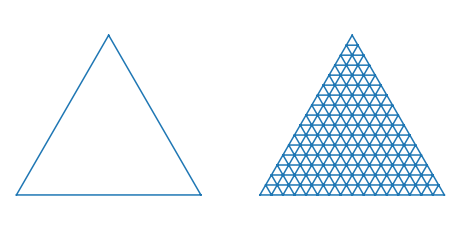

In [10]:
import matplotlib.tri as tri

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])
refiner = tri.UniformTriRefiner(triangle)
# split original triangle into 4**subdiv subtriangles
trimesh = refiner.refine_triangulation(subdiv=4)

plt.figure(figsize=(8, 4))
for (i, mesh) in enumerate((triangle, trimesh)):
    plt.subplot(1, 2, i+ 1)
    plt.triplot(mesh)
    plt.axis('off')
    plt.axis('equal')

alphas = [[0.999] * 3, [5] * 3, [2, 5, 15]]

from scipy.stats import dirichlet as Dir

samples = Dir([0.5, 1, 100]).rvs(10); samples